In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221213_junk_tue.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-14 01:00:00,#bakusho,1213162583613562880,6041__
1,2022-12-14 01:00:00,#bakusho,1969337972,saha_radi0
2,2022-12-14 01:00:00,#bakusho,90164165,kngy000
3,2022-12-14 01:00:01,#bakusho,910078004839116800,yellgun0606
4,2022-12-14 01:00:01,#bakusho,901417354730496000,nauman_0954
...,...,...,...,...
983,2022-12-14 03:01:55,田中さん、太田さん、お疲れ樣でした。日時式場 #bakusho,14360739,kazura
984,2022-12-14 03:01:58,JUNK 爆笑問題カーボーイ │ TBSラジオ 今週も２人のトークでほっとする時間が過ごせた...,1545340535753154561,4oV1YpDOSrJWFBA
985,2022-12-14 03:02:31,誰に投票すりゃいいんだYO！！！ こうなったら自分にか？けど私より面白いメールを書く人はごま...,2235617196,tarako_ja_nai
986,2022-12-14 03:03:37,年の瀬を感じるお知らせが沢山! 来年のイベントも楽しみ! 頑張れ、ウエストランド＆キュウ!!...,101186658,hige_gun


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-14 01:00:00,77
1,2022-12-14 01:01:00,27
2,2022-12-14 01:02:00,32
3,2022-12-14 01:03:00,14
4,2022-12-14 01:04:00,8
...,...,...
119,2022-12-14 02:59:00,18
120,2022-12-14 03:00:00,2
121,2022-12-14 03:01:00,7
122,2022-12-14 03:02:00,1


In [4]:
filename =  "count_221213_junk_tue.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(77, 0)

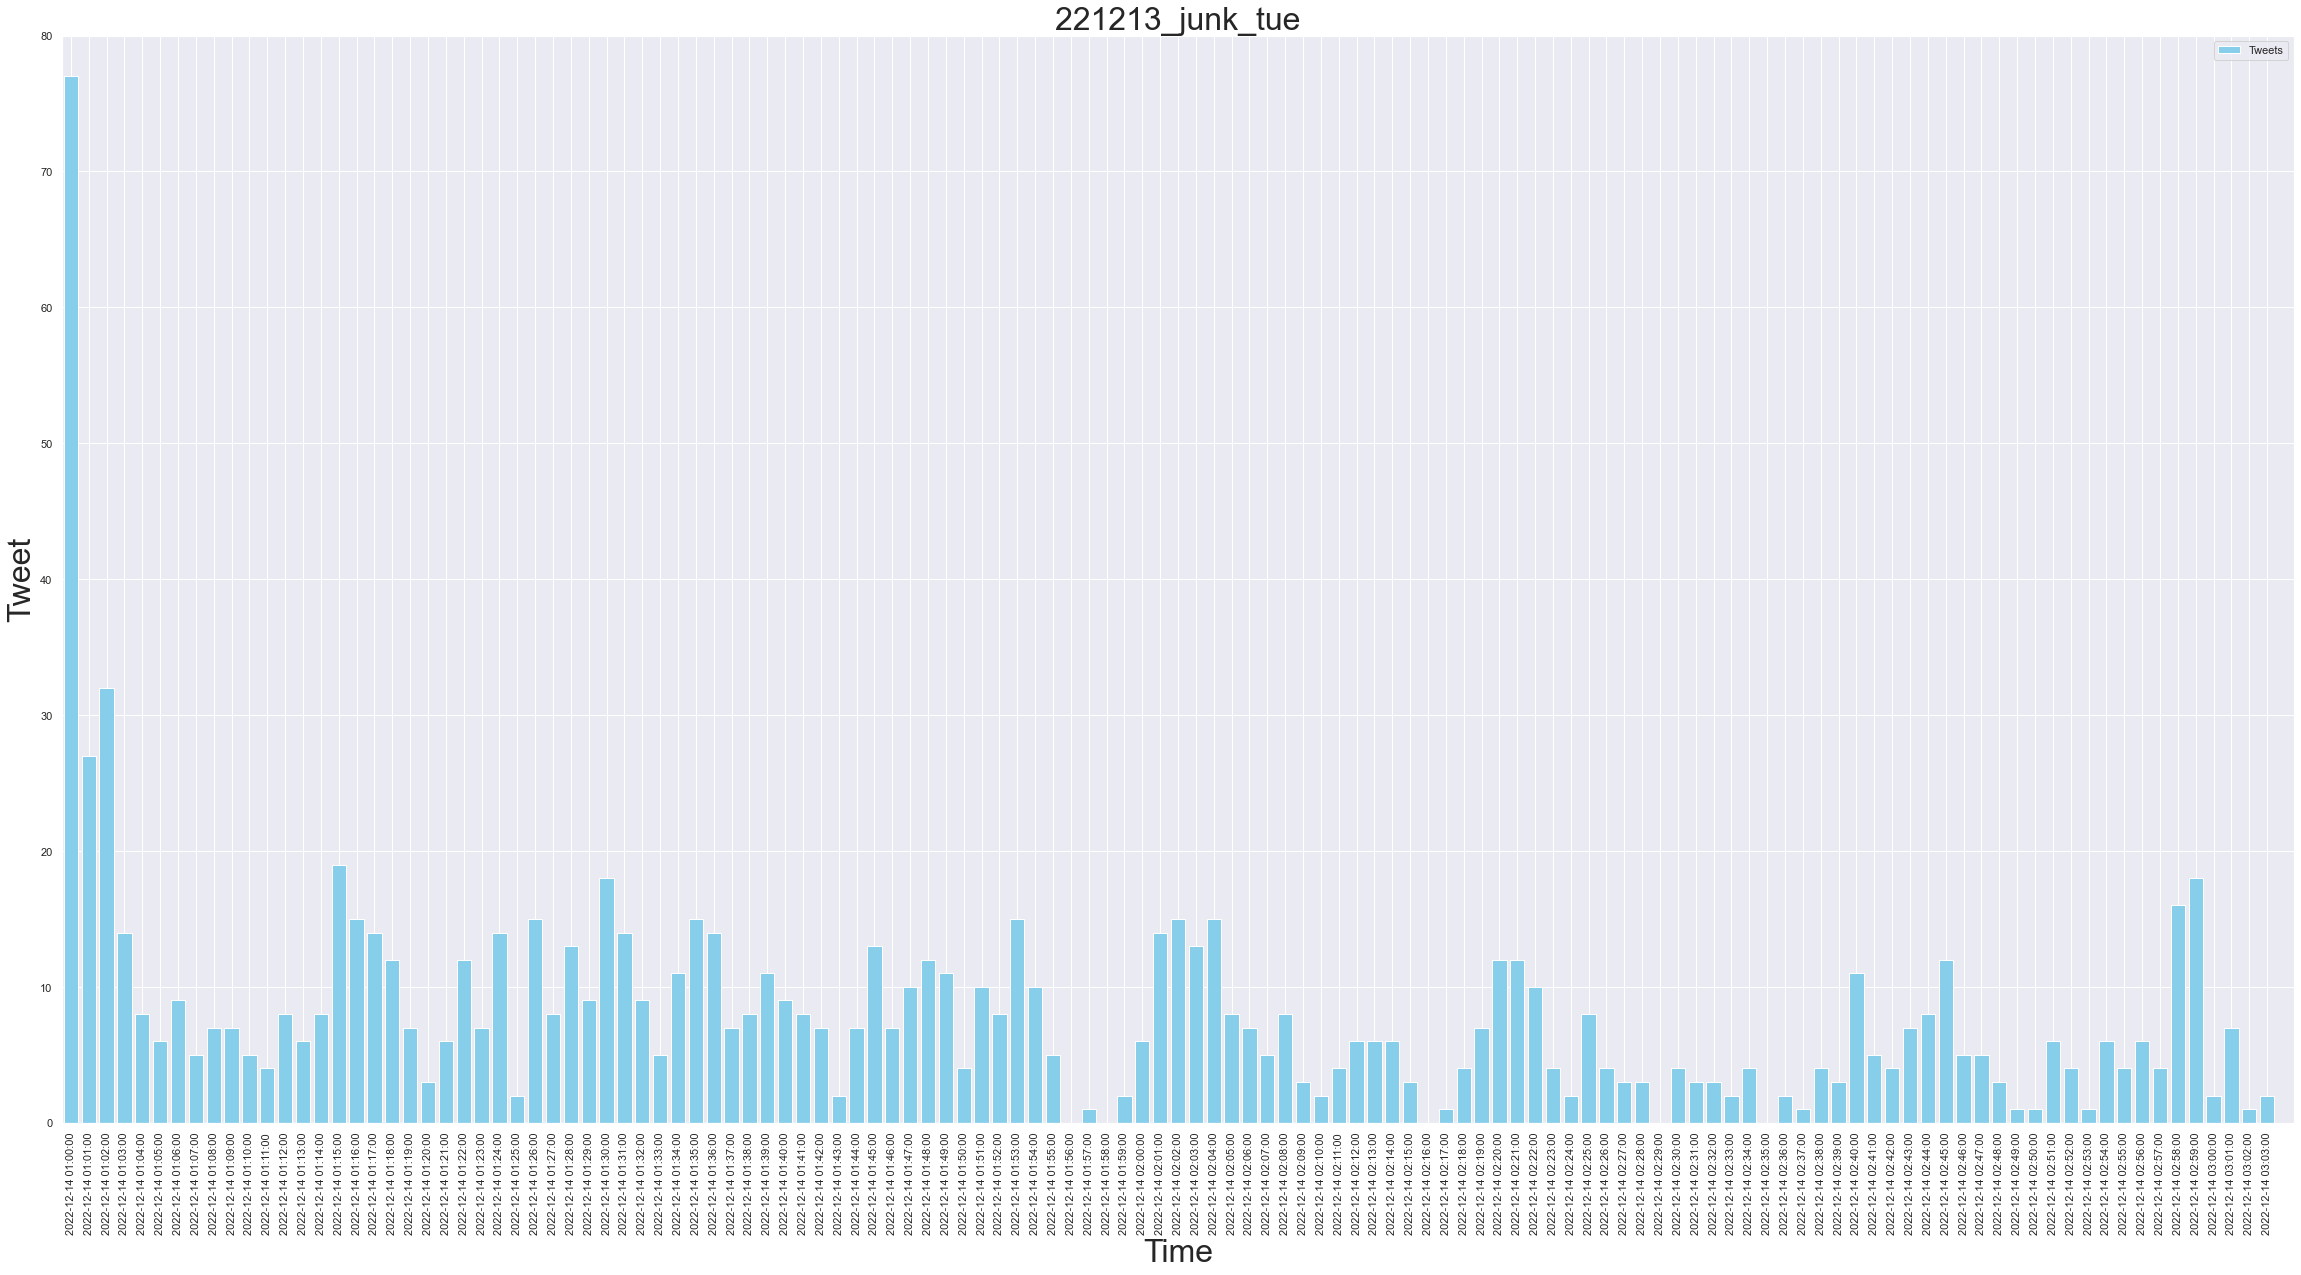

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221213_junk_tue", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 80) # y軸の範囲を指定する
start = 0
end = 81
stepsize = 10
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")